In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys

!ls ./data/cleaned/ -l | head -n 4

import calendar

total 0
-rwxr-xr-x 1 jahirmedinacs jahirmedinacs  5093 Feb 28 12:01 2017_01_02.csv
-rwxr-xr-x 1 jahirmedinacs jahirmedinacs  7316 Feb 28 12:01 2017_01_03.csv
-rwxr-xr-x 1 jahirmedinacs jahirmedinacs  6591 Nov 26 22:13 2017_01_04.csv
ls: write error: Broken pipe


In [3]:
_relative_path = "./data/cleaned/"

In [30]:
files_names = [[None] * 31 for ii in range(12)]
for ii in os.listdir(_relative_path):
    indx = [int(jj) - 1 for jj in ii.split(".")[0].split("_")[1:]]
    if(len(indx)) < 2:
        month = indx[0]
        day = 0
    else:
        [month, day] = indx
    files_names[month][day] = [_relative_path + ii, (month + 1, day + 1)]

In [31]:
_temp = []
for ii in files_names:
    _temp += [jj for jj in ii if jj is not None]

In [62]:
_df_set = [[None] * 31 for ii in range(12)]
multi_indx = []
analytics = []
_tmp_multi_indx = []

for jj in files_names:
    for ii in jj:
        if ii is not None:
            temp = pd.read_csv(ii[0], header=1, encoding ='latin1')

            n_vist = temp[temp.columns[0]].values
            n_month = [ii[1][0]] * len(n_vist)
            n_day = [ii[1][1]] * len(n_vist)

            analytics += [len(temp.columns)]
            _tmp_multi_indx += [ii[1]]

            multi_indx += list(zip(n_month, n_day, n_vist))
            _df_set[ii[1][0] - 1][ii[1][1] - 1] = temp
        else:
            pass

In [63]:
_tmp_idx = pd.MultiIndex.from_tuples(_tmp_multi_indx, names=['mes', 'dia'])

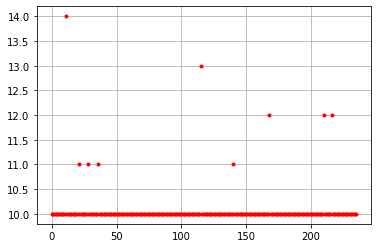

In [64]:
plt.grid()
plt.plot(analytics, '.r')

In [65]:
analytics = pd.DataFrame(data=analytics, index=_tmp_idx, columns=["cols"])

In [66]:
analytics[analytics.cols > 10]

cols
mes dia      
1   17     14
    31     11
2   9      11
    21     11
6   16     13
8   18     11
9   27     12
11  24     12
12  4      12

In [71]:
manual_clean = []
special_dates = (np.matrix(analytics[analytics.cols > 10].index.tolist()) -1).tolist()
date_indx = list(zip(special_dates, range(len(special_dates))))
for coords in special_dates:
    manual_clean.append(_df_set[coords[0]][coords[1]])

In [73]:
date_indx

[([0, 16], 0),
 ([0, 30], 1),
 ([1, 8], 2),
 ([1, 20], 3),
 ([5, 15], 4),
 ([7, 17], 5),
 ([8, 26], 6),
 ([10, 23], 7),
 ([11, 3], 8)]

In [76]:
current = manual_clean[0]

In [92]:
current[current.columns[10:]].isna().sum()

Unnamed: 10    75
Unnamed: 11    75
Unnamed: 12    75
Unnamed: 13    74
dtype: int64

In [ ]:
_mega_df = pd.concat(_df_set, sort=False)

In [ ]:
special_multi = pd.MultiIndex.from_tuples(multi_indx, names=['mes', 'dia', 'visita_nro'])

In [ ]:
data = pd.DataFrame(_mega_df.values, index=special_multi)

In [ ]:
data

<function calendar.monthrange(year, month)>